In [23]:
import matplotlib.pyplot as plt
import numpy as np

import sys, os
from pathlib import Path
sys.path.append(str(Path(os.getcwd()).parent))

from general.pulses import blackman_pulse, square_pulse
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors += colors

from general.plot_settings import paper_settings
plt.rcParams.update(paper_settings)

from matplotlib.ticker import NullLocator

The area of the square pulse is 0.9984
The area of the Blackman pulse is 0.4195800001922482
The area ratio is 0.42025240403871017
The area of the square pulse squared is 0.9984
The area of the Blackman pulse squared is 0.30429539999999966
The squared area ratio is 0.30478305288461505


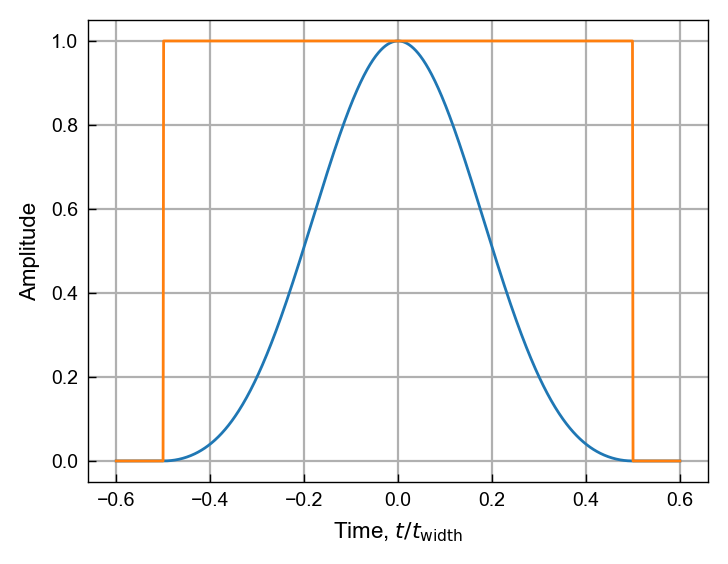

In [2]:
t_min, t_max = (-6, 6)
num = 1000
t = np.linspace(t_min, t_max, num)
t_width = 10

fig, ax = plt.subplots(figsize=(4,3))

ax.plot(t/t_width, blackman_pulse(t+t_width/2, t_width))
ax.plot(t/t_width, square_pulse(t+t_width/2, t_width))
ax.grid(True)
ax.set(xlabel=r"Time, $t/t_\mathrm{width}$", ylabel="Amplitude")

dt = (t_max - t_min)/num/t_width
A_blackman = np.trapezoid(blackman_pulse(t+t_width/2, t_width), dx=dt)
A_square = np.trapezoid(square_pulse(t+t_width/2, t_width), dx=dt)
A2_blackman = np.trapezoid(blackman_pulse(t+t_width/2, t_width)**2, dx=dt)
A2_square = np.trapezoid(square_pulse(t+t_width/2, t_width)**2, dx=dt)

print(f"The area of the square pulse is {A_square}")
print(f"The area of the Blackman pulse is {A_blackman}")
print(f"The area ratio is {A_blackman/A_square}")

print(f"The area of the square pulse squared is {A2_square}")
print(f"The area of the Blackman pulse squared is {A2_blackman}")
print(f"The squared area ratio is {A2_blackman/A2_square}")

plt.show()

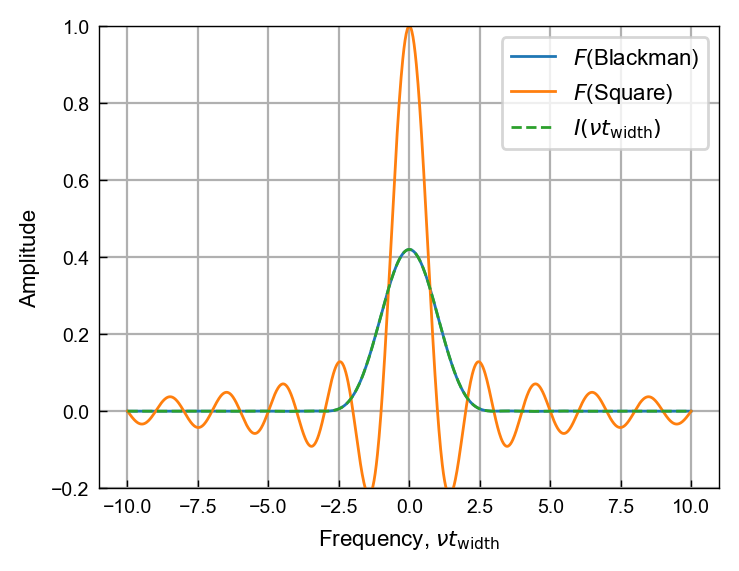

In [3]:
from general.pulses import blackman_fourier, blackman_instrument

nu = np.linspace(-1, 1, 1000)
t_width = 10

fig, ax = plt.subplots(figsize=(4,3))

ax.plot(nu * t_width, blackman_fourier(nu, t_width)/t_width, label=r'$F$(Blackman)')
ax.plot(nu * t_width, t_width*np.sinc(t_width*nu)/t_width, label=r'$F$(Square)')
ax.plot(nu * t_width, blackman_instrument(nu, t_width)/t_width, '--', label=r'$I(\nu t_\mathrm{width})$')
ax.grid(True)
ax.set(xlabel=r"Frequency, $\nu t_\mathrm{width}$", ylabel="Amplitude", ylim=[-0.2, 1])
ax.legend(loc="upper right")

plt.show()

In [4]:
0.42


0.42

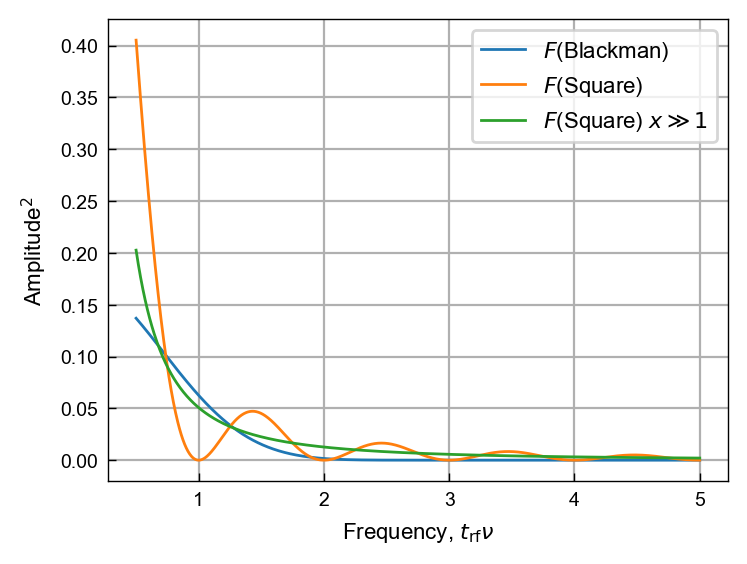

In [5]:
from general.pulses import blackman_fourier

nu = np.linspace(0.05, 0.5, 1000)

def large_x_sinc(x):
    return 1/np.sqrt(2)* np.piecewise(x, [x==0, x!=0], [1, lambda x: 1/(np.pi * x)])

fig, ax = plt.subplots(figsize=(4,3))

ax.plot(nu * t_width, (blackman_fourier(nu, t_width)/t_width)**2, label=r'$F$(Blackman)')
ax.plot(nu * t_width, np.sinc(t_width*nu)**2, label=r'$F$(Square)')
ax.plot(nu * t_width, large_x_sinc(t_width*nu)**2, label=r'$F$(Square) $x\gg1$') 
ax.grid(True)
ax.set(xlabel=r"Frequency, $t_\mathrm{rf} \nu$", ylabel=r"Amplitude$^2$")
ax.legend(loc="upper right")

# ratio = (blackman_fourier(nu_test, t_width)/t_width)**2/large_x_sinc(t_width*nu_test)**2

# print(f"Average SquareFourier^2 at large x compared to BlackmanFourier^2 is {ratio}")

plt.show()

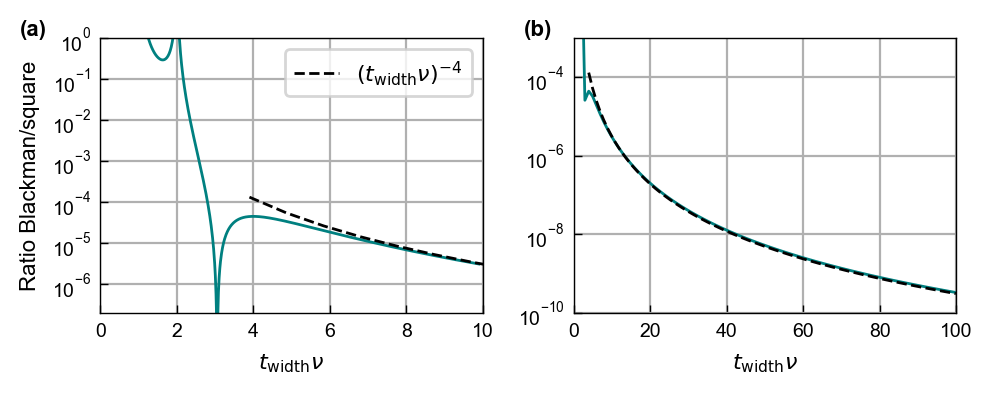

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(5,2))

def ratio_func(det):
    return (blackman_fourier(det, 1))**2/np.sinc(det)**2

ax = axs[0]
detuning = np.linspace(0.9, 9.9, 1000)
ax.plot(detuning, ratio_func(detuning), color='teal')
detuning = np.linspace(3.9, 99.9, 100)
ax.plot(detuning, detuning**(-4)/33, '--', label=r'$(t_\mathrm{width} \nu)^{-4}$', color='k')
ax.grid(True)
ax.set(xlabel=r"$t_\mathrm{width} \nu$", ylabel=r"Ratio Blackman/square",
       yscale='log', ylim=(2e-7, 1), xlim=(0, 10))
ax.minorticks_off()
ax.legend()

ax = axs[1]
detuning = np.linspace(0.9, 99.9, 100)
ax.plot(detuning, ratio_func(detuning), color='teal')
detuning = np.linspace(3.9, 99.9, 100)
ax.plot(detuning, detuning**(-4)/33, '--', color='k')
ax.grid(True)
ax.set(xlabel=r"$t_\mathrm{width} \nu$", yscale='log', ylim=(1e-10, 1e-3), xlim=(0, 100))

fig.tight_layout()

subplot_labels = ['(a)', '(b)']
x_offsets = [-0.21, -0.13]
for ax, label, x_offset in zip(axs, subplot_labels, x_offsets):
	ax.text(x_offset, 1.01, label, transform=ax.transAxes, fontweight='bold', fontsize=8)
	
plt.subplots_adjust(top=0.90)

fig.savefig("outputs/blackman_vs_square_pulse_detuning.pdf")

plt.show()

## Convolution of Blackman on -3/2s tail

In [7]:
from general.pulses import blackman_convolution_correction

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors += colors

# --- Parameters ---
x_a = 4                 # Rollover to -5/2s tail.
HFT_cutoff = 50e3       # Set minimum detuning to be 50kHz.


t_widths = np.array([0.1, 0.2, 0.4, 0.8, 1.0, 5., 10., 12., 15., 17., 20., 30., 40., 60., 120., 200., 
                     2000., 20000.
                     ]) * 1e-6  # us
detunings = 3/t_widths  # Detuning of Blackman pulse in MHz
detunings[detunings < HFT_cutoff] = HFT_cutoff

Ms = np.zeros_like(t_widths)

Ms = np.array([blackman_convolution_correction(d, t) for d, t in zip(detunings, t_widths)])

# for trf, M in zip(t_widths, Ms):
#     print(f"For {t_width:.1f}us pulse, overestimation is {M:.3f}.")


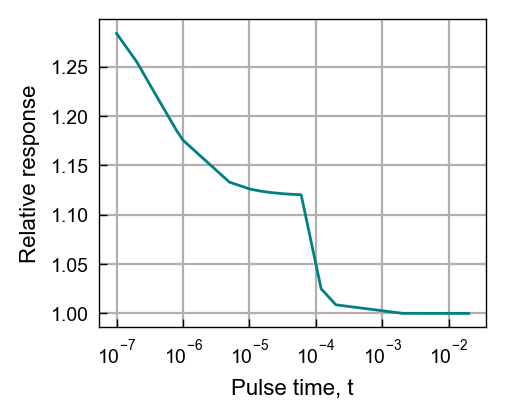

In [12]:
fig, ax = plt.subplots(figsize=(2.5,2))
ax.plot(t_widths, Ms, color='teal')
ax.set(xlabel="Pulse time, t", ylabel="Relative response", xscale='log')
ax.grid(True)
ax.minorticks_off()

plt.show()

## Single-particle residue contamination

### Fermi time or 11us pulse

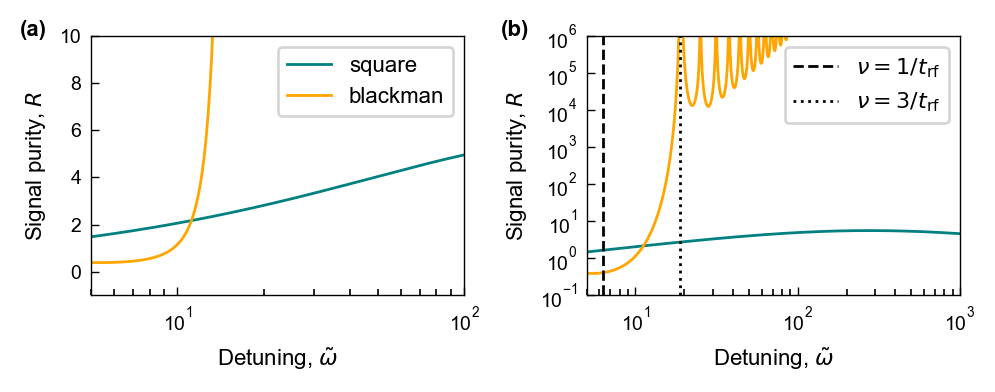

In [87]:
colors = ['teal', 'orange']

tau_F = 11e-6
trf = 11e-6

omega_trf = 2*np.pi/trf * tau_F
omega_a = 2 * np.pi * 4e6 * tau_F
OmegaR = 2 / trf
C = 3

def alpha_HFT(omega):
    return 2**(-3/2)/np.pi * tau_F * trf * C * omega**(-3/2) * OmegaR**2 / (1+omega/omega_a)

def alpha_res(omega):
    nu = omega/tau_F/2/np.pi
    return np.sinc(trf * nu)**2 * OmegaR**2 / 4 * trf**2

def alpha_res_lim(omega):
    return  OmegaR**2/(omega/tau_F)**2/2

def alpha_HFT_blackman(omega):
    return alpha_HFT(omega) * 0.305

def alpha_res_blackman(omega):
    nu = omega/tau_F/2/np.pi
    return (blackman_instrument(nu, trf)/trf)**2 * OmegaR**2 / 4 * trf**2

fig, axs = plt.subplots(1, 2, figsize=(5, 2))


ax = axs[0]
ylims = (-1, 10)
xlims = (5, 100)
detuning = np.linspace(*xlims, 1000)
ax.set(xlabel=r"Detuning, $\tilde \omega$", ylabel=r'Signal purity, $R$', 
       xscale='log', ylim=ylims, xlim=xlims)
ax.plot(detuning, alpha_HFT(detuning)/alpha_res_lim(detuning), label='square', color=colors[0])
ax.plot(detuning, alpha_HFT_blackman(detuning)/alpha_res_blackman(detuning), label='blackman', color=colors[1])

ax.legend()

ax = axs[1]
ylims = (0.1, 1e6)
xlims = (5, 1000)
detuning = np.logspace(np.log10(5), 3, 1000)
ax.set(xlabel=r"Detuning, $\tilde \omega$", ylabel=r'Signal purity, $R$', 
       xscale='log', yscale='log', ylim=ylims, xlim=xlims)
ax.plot(detuning, alpha_HFT(detuning)/alpha_res_lim(detuning), color=colors[0])
ax.plot(detuning, alpha_HFT_blackman(detuning)/alpha_res_blackman(detuning), color=colors[1])
ax.vlines(omega_trf, *ylims, 'k', '--', label=r'$\nu = 1/t_\mathrm{rf}$')
ax.vlines(3*omega_trf, *ylims, 'k', ':', label=r'$\nu = 3/t_\mathrm{rf}$')
ax.legend()
ax.yaxis.set_minor_locator(NullLocator())

fig.tight_layout()

subplot_labels = ['(a)', '(b)']
x_offsets = [-0.19, -0.23]
for ax, label, x_offset in zip(axs, subplot_labels, x_offsets):
	ax.text(x_offset, 1.00, label, transform=ax.transAxes, fontweight='bold', fontsize=8)
	
plt.subplots_adjust(top=0.90)

fig.savefig("outputs/signal_purity.pdf")
plt.show()


In [89]:
nu = 14.5
alpha_HFT_blackman(nu)/alpha_res_blackman(nu)
np.max(alpha_HFT(detuning)/alpha_res_lim(detuning))

np.float64(5.613612043447473)

In [86]:
2*np.pi**2*100



1973.9208802178716

In [90]:
2400/1e2

24.0

### 110us pulse

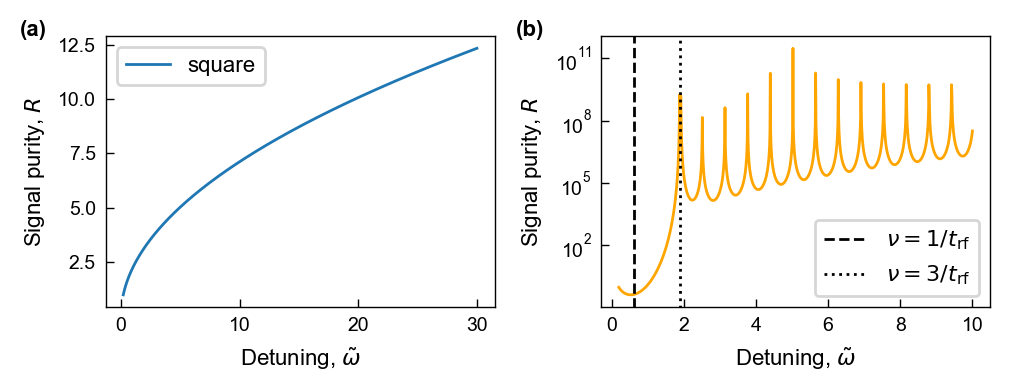

In [45]:
tau_F = 11e-6
trf = 110e-6

omega_trf = 2*np.pi/trf * tau_F

OmegaR = 2 / trf
C = 1

def alpha_HFT(omega):
    return 2**(-3/2)/np.pi * tau_F * trf * C * omega**(-3/2) * OmegaR**2

def alpha_res(omega):
    nu = omega/tau_F/2/np.pi
    return np.sinc(trf * nu)**2 * OmegaR**2 / 4 * trf**2

def alpha_res_lim(omega):
    return  OmegaR**2/(omega/tau_F)**2/2

def alpha_HFT_blackman(omega):
    return alpha_HFT(omega) * 0.305

def alpha_res_blackman(omega):
    nu = omega/tau_F/2/np.pi
    return (blackman_instrument(nu, trf)/trf)**2 * OmegaR**2 / 4 * trf**2

fig, axs = plt.subplots(1, 2, figsize=(5, 2))


ax = axs[0]
detuning = np.linspace(0.2, 30, 1000)
ax.set(xlabel=r"Detuning, $\tilde \omega$", ylabel=r'Signal purity, $R$')
ax.plot(detuning, alpha_HFT(detuning)/alpha_res_lim(detuning), label='square')

ax.legend()

ax = axs[1]
ylims = (0.1, 1e13)
xlims = (0.2, 10)
detuning = np.linspace(*xlims, 1000)
ax.set(xlabel=r"Detuning, $\tilde \omega$", ylabel=r'Signal purity, $R$', 
       yscale='log')
ax.plot(detuning, alpha_HFT_blackman(detuning)/alpha_res_blackman(detuning), color=colors[1])
ax.vlines(omega_trf, *ylims, 'k', '--', label=r'$\nu = 1/t_\mathrm{rf}$')
ax.vlines(3*omega_trf, *ylims, 'k', ':', label=r'$\nu = 3/t_\mathrm{rf}$')
ax.legend()

fig.tight_layout()

subplot_labels = ['(a)', '(b)']
x_offsets = [-0.22, -0.22]
for ax, label, x_offset in zip(axs, subplot_labels, x_offsets):
	ax.text(x_offset, 1.00, label, transform=ax.transAxes, fontweight='bold', fontsize=8)
	
plt.subplots_adjust(top=0.90)

fig.savefig("outputs/signal_purity_110us.pdf")
plt.show()

In [80]:
0.42**2

0.17639999999999997

## Dimer signal contamination

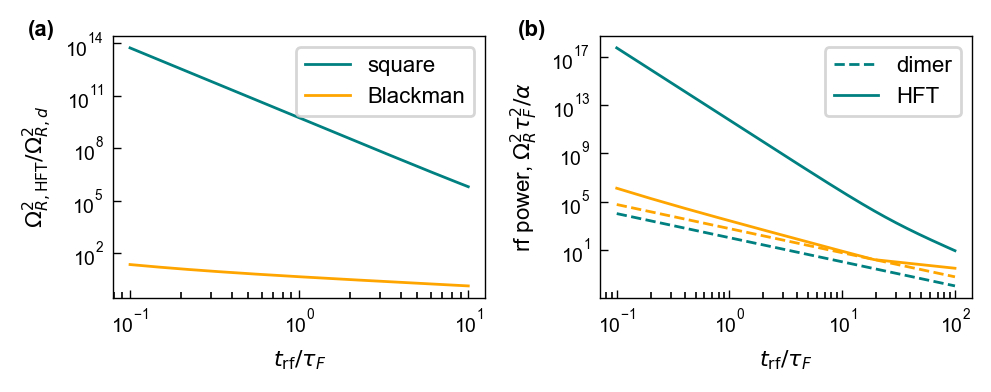

In [71]:
# import numpy as np
# R = 1
# omega_tilde_factors = (np.sqrt(2) * np.pi * 0.18**2 * (2*np.pi)**4/0.305)**(2/9)

# num_factors = omega_tilde_factors**6 * 2 /((2*np.pi)**4 * 0.18**2)

# print(num_factors/1e4)
# omega_d = 2*np.pi*4e6
# C = 1
# kF_ell_d = 4*np.pi/1e2
# R = 10
# factor = ((2*np.pi)**5*R/kF_ell_d/C * 0.18**2/0.42**2)**(1/6)
# trf = omega_d**(-1) * factor

# trf*1e6
# factor
# R = 10
# C = 1

# ratio = (0.026)*(0.42**2) * kF_ell_d/4/np.pi * R**(1/3) /C**(1/3)
# ratio
# (0.18**2 * (2*np.pi)**4 * np.sqrt(2)*np.pi / 0.305)**(2/9)
# 4.3*10**(2/9) * 15

tau_F = 11e-6
omega_d = 2*np.pi * 4e6
tildeomega_a = omega_d * tau_F
C = 1
kF_ell_d = 4*np.pi / 1e2
R = 100

HFT_cutoff = 1


def dimer_power(t):
    """Dimer power as \Omega_R^2\tau_F^2/\alpha_d as a function of
    time in Fermi time units."""
    return 4*np.pi/kF_ell_d/C *t**(-2)


def dimer_power_blackman(t):
    """Dimer power as \Omega_R^2\tau_F^2/\alpha_d as a function of
    time in Fermi time units, for a Blackman pulse."""
    return 4*np.pi/kF_ell_d/C *t**(-2) / 0.42**2


def omega_clean(t):
    """Returns the tilde omega needed to maintain R signal purity for a 
    square pulse in the HFT."""
    omega = R**2 * 2*np.pi**2 / C**2 * t**(-2)
    omega[omega < 2] = 2
    return omega


def omega_clean_blackman(t):
    omega = 6*np.pi/t
    omega[omega < HFT_cutoff] = HFT_cutoff
    return omega


def hft_power(t, pulse=''):
    """HFT power as \Omega_R^2\tau_F^2/\alpha_HFT as a function of
    time in Fermi time units."""
    if pulse == 'Blackman':
        tildeomega = omega_clean_blackman(t)
        power = 2**(3/2)*np.pi / t / C * tildeomega**(3/2) * \
        (1 + tildeomega/tildeomega_a) / 0.305

    else:
        tildeomega = omega_clean(t)
        power = 2**(3/2)*np.pi / t / C * tildeomega**(3/2) * \
            (1 + tildeomega/tildeomega_a) 
        
    return power
    # return 8*np.pi**4 * R**3/C**4 *t**(-4)


fig, axs = plt.subplots(1, 2, figsize=(5,2))

ax = axs[1]
ax.set(xlabel=r"$t_\mathrm{rf}/\tau_F$", 
       ylabel=r'rf power, $\Omega_R^2\tau_F^2/\alpha$',
       yscale='log', xscale='log')

t = np.linspace(0.1, 100, 1000)
ax.plot(t, dimer_power(t), '--', label='dimer', color=colors[0])
ax.plot(t, hft_power(t), label='HFT', color=colors[0])
# ax.plot(t, hft_power_fse(t), ':', color=colors[0])

ax.plot(t, dimer_power_blackman(t), '--', color=colors[1])
ax.plot(t, hft_power(t, pulse='Blackman'),  color=colors[1])
# ax.plot(t, hft_power_blackman_fse(t), ':',  color=colors[1])
ax.legend()


ax = axs[0]
ax.set(xlabel=r"$t_\mathrm{rf}/\tau_F$", 
       ylabel=r'$\Omega_{R,\mathrm{HFT}}^2/\Omega_{R,d}^2$',
       yscale='log', xscale='log')

t = np.linspace(0.1, 10, 1000)

ax.plot(t, hft_power(t)/dimer_power(t), label='square', color=colors[0])
ax.plot(t, hft_power(t, pulse='Blackman')/dimer_power_blackman(t), label='Blackman', color=colors[1])
# ax.plot(t, hft_power_fse(t)/dimer_power(t), ':', color=colors[0])
# ax.plot(t, hft_power_blackman_fse(t)/dimer_power_blackman(t), ':', color=colors[1])
ax.legend()
ax.yaxis.set_minor_locator(NullLocator())

subplot_labels = ['(a)', '(b)']
x_offsets = [-0.23, -0.22]
for ax, label, x_offset in zip(axs, subplot_labels, x_offsets):
	ax.text(x_offset, 1.00, label, transform=ax.transAxes, fontweight='bold', fontsize=8)
	
plt.subplots_adjust(top=0.90)

fig.tight_layout()
# fig.savefig("outputs/dimer_vs_HFT_power.pdf")

plt.show()




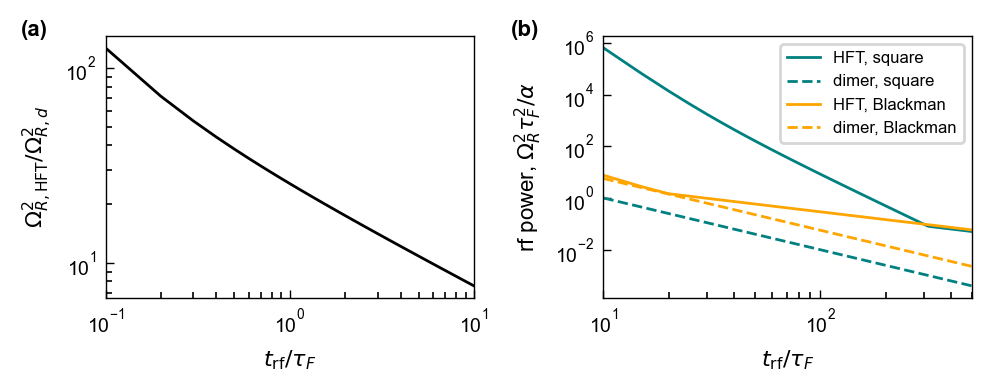

In [81]:
fig, axs = plt.subplots(1, 2, figsize=(5,2))

ax = axs[0]
ax.set(xlabel=r"$t_\mathrm{rf}/\tau_F$", 
       ylabel=r'$\Omega_{R,\mathrm{HFT}}^2/\Omega_{R,d}^2$',
       yscale='log', xscale='log', xlim=(0.1,10))

t = np.linspace(0.1, 10, 100)
ax.plot(t, hft_power(t, pulse='Blackman')/dimer_power(t), color='k')


ax = axs[1]
ax.set(xlabel=r"$t_\mathrm{rf}/\tau_F$", 
       ylabel=r'rf power, $\Omega_R^2\tau_F^2/\alpha$',
       yscale='log', xscale='log', xlim=(10, 500))

t = np.linspace(10, 500, 100)
ax.plot(t, hft_power(t), label='HFT, square', color=colors[0])
ax.plot(t, dimer_power(t), '--', label='dimer, square', color=colors[0])
# ax.plot(t, hft_power_fse(t), ':', color=colors[0])

ax.plot(t, hft_power(t, pulse='Blackman'), label='HFT, Blackman',  color=colors[1])
ax.plot(t, dimer_power_blackman(t), '--', label='dimer, Blackman', color=colors[1])
# ax.plot(t, hft_power_blackman_fse(t), ':',  color=colors[1])
ax.legend(fontsize=6)
ax.yaxis.set_minor_locator(NullLocator())

subplot_labels = ['(a)', '(b)']
x_offsets = [-0.23, -0.25]
for ax, label, x_offset in zip(axs, subplot_labels, x_offsets):
	ax.text(x_offset, 1.00, label, transform=ax.transAxes, fontweight='bold', fontsize=8)
	
plt.subplots_adjust(top=0.90)

fig.tight_layout()
fig.savefig("outputs/dimer_vs_HFT_power.pdf")

plt.show()

In [175]:
2*np.sqrt(2)*np.pi*(6*np.pi)**(3/2)/0.305

np.float64(2384.222112118256)

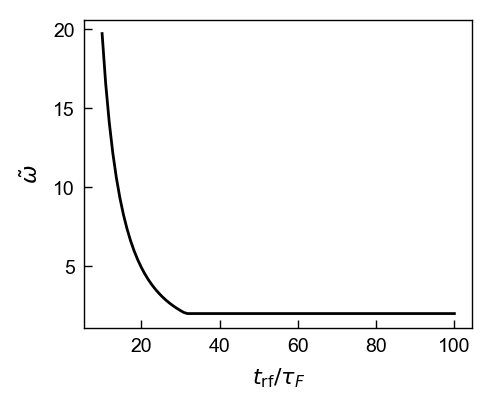

In [68]:
# t = 200

fig, ax = plt.subplots(1, 1, figsize=(2.5,2))

ax.set(xlabel=r"$t_\mathrm{rf}/\tau_F$", 
       ylabel=r'$\tilde\omega$')

t = np.linspace(10, 100, 100)
ax.plot(t, omega_clean(t), color='k')



In [56]:
print(R, C)

10 1


In [31]:
1*np.sqrt(1/3)

np.float64(0.5773502691896257)

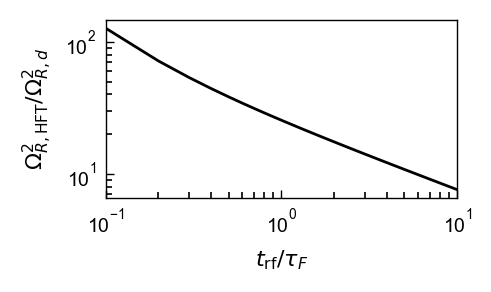

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(2.5, 1.5))

ax.set(xlabel=r"$t_\mathrm{rf}/\tau_F$", 
       ylabel=r'$\Omega_{R,\mathrm{HFT}}^2/\Omega_{R,d}^2$',
       yscale='log', xscale='log', xlim=(0.1,10))

t = np.linspace(0.1, 10, 100)
ax.plot(t, hft_power(t, pulse='Blackman')/dimer_power(t), color='k')

fig.tight_layout()
fig.savefig("outputs/short_pulse_dimer_vs_HFT.pdf")

In [77]:
hft_power(np.array([1.]), pulse='Blackman')/dimer_power(np.array([1.]))

array([25.46782711])

## Plot for figures

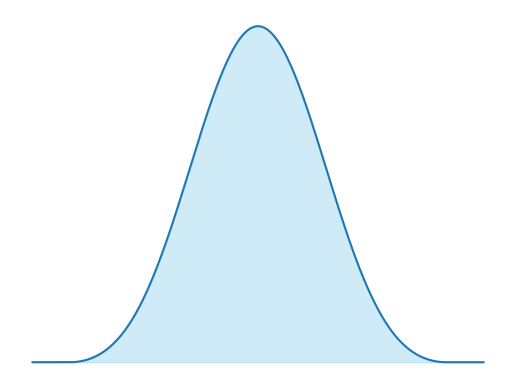

In [ ]:
t = np.linspace(-0.1, 1.1, 1000)
t_width = 1

y = blackman_pulse(t, t_width)

fig, ax = plt.subplots()
ax.plot(t, y)
ax.fill_between(t, y, color='skyblue', alpha=0.4) 
# plt.plot(t, square_pulse(t, t_width))
ax.set(xlabel="Time, t", ylabel="Amplitude")

ax.axis('off')

plt.show()

# fig.savefig("outputs/blackman_envelope_with_fill.pdf")

## Understanding a_1 coefficient sign

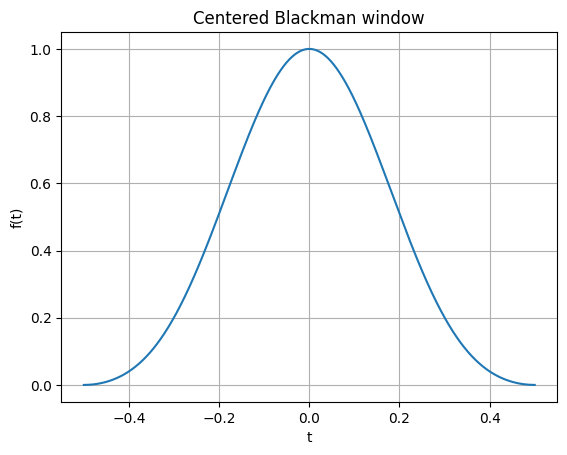

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha = 0.16
a0 = (1 - alpha)/2
a1 = 0.5
a2 = alpha/2

t_w = 1.0
t = np.linspace(-t_w/2, t_w/2, 1000)
f = a0 + a1*np.cos(2*np.pi*t/t_w) + a2*np.cos(4*np.pi*t/t_w)

plt.plot(t, f)
plt.title("Centered Blackman window")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.show()
